# Wage1 DataFrame

*526 records*

| Index &nbsp; | Name &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Description                     |
|--------------|:------------------------------------------------------|--------------------------------:|
|  0           | `wage`                                                | average hourly earnings         |
|  1           | `educ`                                                | years of education              |
|  2           | `exper`                                               | years potential experience      |
|  3           | `tenure`                                              | years with current employer     |
|  4           | `nonwhite`                                            | =1 if nonwhite                  |
|  5           | `female`                                              | =1 if female                    |
|  6           | `married`                                             | =1 if married                   |
|  7           | `numdep`                                              | number of dependents            |
|  8           | `smsa`                                                | =1 if live in SMSA              |
|  9           | `northcen`                                            | =1 if live in north central U.S |
| 10           | `south`                                               | =1 if live in southern region   |
| 11           | `west`                                                | =1 if live in western region    | 
| 12           | `construc`                                            | =1 if work in construc. indus.  |
| 13           | `ndurman`                                             | =1 if in nondur. manuf. indus.  |
| 14           | `trcommpu`                                            | =1 if in trans, commun, pub ut  |
| 15           | `trade`                                               | =1 if in wholesale or retail    |
| 16           | `services`                                            | =1 if in services indus.        |
| 17           | `profserv`                                            | =1 if in prof. serv. indus.     |
| 18           | `profocc`                                             | =1 if in profess. occupation    |
| 19           | `clerocc`                                             | =1 if in clerical occupation    |
| 20           | `servocc`                                             | =1 if in service occupation     |
| 21           | `lwage`                                               | log(wage)                       |
| 22           | `expersq`                                             | exper^2                         |
| 23           | `tenursq`                                             | tenure^2                        |

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import t

df = pd.read_csv(
    "./data/wage1.raw", 
    delim_whitespace = True, 
    names = ["wage", "educ", "exper", "tenure", "nonwhite", "female", "married", "numdep", "smsa", "northcen", "south", "west", "construc", "ndurman", "trcommpu", "trade", "services", "profserv", "profocc", "clerocc", "servocc", "lwage", "expersq", "tenursq"]
)

# Exercise 1

In [2]:
# Defines the dependent variable matrix y
y = np.matrix(df["wage"]).T

# Defines the explanatory variables matrix X
X = np.matrix(np.column_stack((np.ones(df["wage"].shape), df["educ"], df["exper"], df["tenure"])))

# Exercise 2

In [5]:
# Obtains β using the OLS method
β = (X.T @ X).I @ X.T @ y

print(f"The β matrix obtained is: \n{β}")

The β matrix obtained is: 
[[-2.87273489]
 [ 0.59896507]
 [ 0.02233952]
 [ 0.16926865]]


# Exercise 3

In [6]:
# Obtains the error (residual) matrix
ε = y - X @ β

# Obtains the SSE (Sum of Squared Errors) (or Residual Sum of Squares)
SSε = (ε.T @ ε).item(0, 0)

# Obtains the error variance
n, k = X.shape
Varε = SSε/(n-k)

# Obtains the variance-covariance matrix of β (var(β))
Varβ = Varε * (X.T @ X).I

# Obtains the β standard deviation matrix (σ(β))
σβ = np.sqrt(np.diag(Varβ))

print(f"The variance-covariance matrix is: \n{Varβ}")
print(f"\nThe standard deviation matrix is: \n{σβ}")

The variance-covariance matrix is: 
[[ 5.31388941e-01 -3.57021879e-02 -4.23690292e-03  1.43314067e-03]
 [-3.57021879e-02  2.63000238e-03  1.94055068e-04 -1.25397327e-04]
 [-4.23690292e-03  1.94055068e-04  1.45367583e-04 -1.32175116e-04]
 [ 1.43314067e-03 -1.25397327e-04 -1.32175116e-04  4.68489017e-04]]

The standard deviation matrix is: 
[0.72896429 0.05128355 0.01205685 0.02164461]


# Exercise 4

The obtained β matrix is: 
[[-1.70094791]
 [ 0.50063696]
 [ 0.01756833]
 [ 0.14558487]]



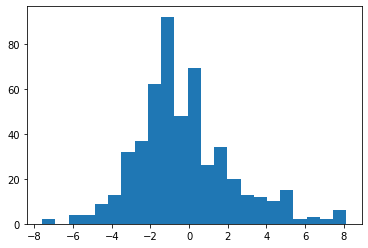

In [9]:
# Deletes the observations in which the error is greater than 3 times the error standard deviation
y = y[np.abs(ε) <= 3*np.sqrt(Varε)].T
X = X[np.squeeze(np.asarray(np.abs(ε) <= 3*np.sqrt(Varε))), :]
ε = ε[np.abs(ε) <= 3*np.sqrt(Varε)].T

# Obtains β using the OLS method
β = (X.T @ X).I @ X.T @ y

print(f"The obtained β matrix is: \n{β}\n")
n, bins, patches = plt.hist(ε, "auto")

# Exercise 5

In [10]:
# Repeats everything that was done in exercise 3
SSε = (ε.T @ ε).item(0, 0)
n, k = X.shape
Varε = SSε/(n-k)
Varβ = Varε * (X.T @ X).I
σβ = np.sqrt(np.diag(Varβ))

# We want to test the hypothesys H0: βexper = 0. To do so we need to normalize the βexper obtained by its standard deviation
βexper_norm = (β[2] / σβ[2]).item(0, 0)

# Now, we obtain the area under the t-student curve at the right of tβexper with n-k degrees of freedom
tβexper = t.sf(βexper_norm, n-k)

# We then multiply its value by 2 in order to consider the other side of the distribution (alternative des deux côtés)
tβexper *= 2

# Then, we obtain the max value of tβexper that we would accept the hypothesys 
tβexper_max = t.ppf(0.95, n-k)

print(f"Since tβexper_max > tβexper ({tβexper_max} > {tβexper}) we don't reject the hypothesys H0: βexper = 0")

Since tβexper_max > tβexper (1.647841008903657 > 0.0797109463623904) we don't reject the hypothesys H0: βexper = 0


# Exercise 6

In [10]:
# Creates an OLS model giving y and X
model = sm.OLS(y, X)

# Shows the results of the OLS model created
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     78.11
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           1.33e-41
Time:                        08:54:43   Log-Likelihood:                -1204.4
No. Observations:                 515   AIC:                             2417.
Df Residuals:                     511   BIC:                             2434.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7009      0.604     -2.818      0.0

# Exercise 7

In [11]:
# Sets y = log(df["wage"]) as requested in the wording of the exercise
y = np.log10(y)

# Recalculates the coefficients matrix β using the OLS method
β = β = (X.T @ X).I @ X.T @ y

# Recalculates the error (residual) matrix
ε = y - X @ β

# Repeats everything that was done in exercise 5
SSε = (ε.T @ ε).item(0, 0)
n, k = X.shape
Varε = SSε/(n-k)
Varβ = Varε * (X.T @ X).I
σβ = np.sqrt(np.diag(Varβ))
βexper_norm = (β[2] / σβ[2]).item(0, 0)
tβexper = t.sf(βexper_norm, n-k)
tβexper *= 2
tβexper_max = t.ppf(0.95, n-k)

print(f"Since tβexper_max > tβexper ({tβexper_max} > {tβexper}) we don't reject the hypothesys H0: βexper = 0")

Since tβexper_max > tβexper (1.647841008903657 > 0.02543663886070723) we don't reject the hypothesys H0: βexper = 0


# Exercise 8

# Exercise 9